In [ ]:
## Based on https://www.youtube.com/watch?v=avv9GQ3b6Qg&t=3398s


In [10]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np



In [11]:
img_array= cv2.imread("train/0/0.jpg")


In [12]:
img_array.shape

(48, 48, 3)

In [13]:
Datadirectory = "train/"

In [14]:
Classes = ["0","1","2","3","4","5","6"]

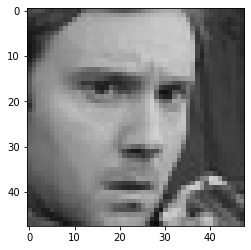

In [15]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

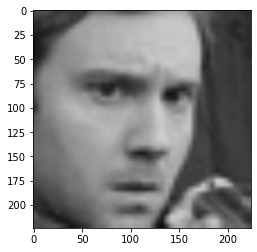

(224, 224, 3)

In [16]:
img_size=224
new_array= cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()
new_array.shape

In [17]:
tr_Data= []
def create_tr_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num= Classes.index(category)
        for img in os.listdir(path):
            try: 
                img_array= cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array,(img_size,img_size))
                tr_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [18]:
create_tr_Data()

In [19]:
print(len(tr_Data))

12442


In [20]:
X= []
y= []
for features,label in tr_Data:
    X.append(features)
    y.append(label)
X= np.array(X).reshape(-1,img_size,img_size,3)

In [21]:
X.shape

(12442, 224, 224, 3)

In [22]:
X= X/255.0; ##normalizing data

In [23]:
y[0]
Y= np.array(y)
Y[7000]

4

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
model = tf.keras.applications.ResNet50()


In [34]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [35]:


base_input= model.layers[0].input
base_output= model.layers[-2].output


In [36]:
base_output

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>

In [37]:
final_output=layers.Dense(128)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)


In [38]:
n_model=keras.Model(inputs= base_input, outputs= final_output)

In [39]:
n_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [23]:
n_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [35]:
n_model.fit(X,Y,epochs = 5)

Epoch 1/5
389/389 [==============================] - 2671s 7s/step - loss: 1.6109 - accuracy: 0.3671
Epoch 2/5
389/389 [==============================] - 1861s 5s/step - loss: 1.3723 - accuracy: 0.4599
Epoch 3/5
389/389 [==============================] - 1916s 5s/step - loss: 1.2625 - accuracy: 0.5108
Epoch 4/5
389/389 [==============================] - 1775s 5s/step - loss: 1.1514 - accuracy: 0.5588
Epoch 5/5
389/389 [==============================] - 1728s 4s/step - loss: 1.0699 - accuracy: 0.5931


In [36]:
n_model.fit(X,Y,epochs = 5)
n_model.save('final_model.h5')

Epoch 1/5
389/389 [==============================] - 1736s 4s/step - loss: 0.9618 - accuracy: 0.6353
Epoch 2/5
389/389 [==============================] - 1708s 4s/step - loss: 0.8572 - accuracy: 0.6730
Epoch 3/5
389/389 [==============================] - 1713s 4s/step - loss: 0.7099 - accuracy: 0.7333
Epoch 4/5
389/389 [==============================] - 1721s 4s/step - loss: 0.5675 - accuracy: 0.7893
Epoch 5/5
389/389 [==============================] - 1729s 4s/step - loss: 0.4368 - accuracy: 0.8390


C:\Users\vivs_\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [3]:
from deepface import DeepFace

In [12]:
test=cv2.imread('TestImg2.jpg')

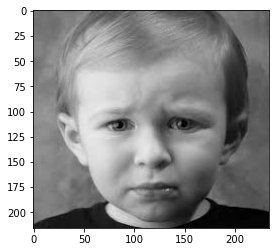

In [13]:
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))

In [14]:
predict= DeepFace.analyze(test)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.36it/s]


In [15]:
predict

{'region': {'x': 50, 'y': 47, 'w': 137, 'h': 165},
 'emotion': {'angry': 50.10646284261124,
  'disgust': 0.00022902840101742667,
  'fear': 1.0878256239191069,
  'happy': 0.00022880311916636967,
  'sad': 48.03394365512989,
  'surprise': 6.113464019701476e-05,
  'neutral': 0.7712538348140618},
 'dominant_emotion': 'angry',
 'age': 29,
 'gender': 'Man',
 'race': {'asian': 20.303404331207275,
  'indian': 3.2489053905010223,
  'black': 0.8749715983867645,
  'white': 35.512250661849976,
  'middle eastern': 7.067204266786575,
  'latino hispanic': 32.99326002597809},
 'dominant_race': 'white'}

In [24]:
path='haarcascade_frontalface_default.xml'
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN
rectangle_bgr=(255,255,255)
img=np.zeros((500,500))
text= 'Random text'
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
text_offset_x=10
text_offset_y=img.shape[0]-25

box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y- text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
cap=cv2.VideoCapture(0)


while True:
    ret,frame=cap.read()
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces= faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        facess= faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print('Face not detected')
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi= roi_color[ey:,ey+eh,ex:ex+ew]
    graytemp= cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
    final_image= cv2.resize(graytemp,(48,48))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    dataa= torch.from_numpy(final_image)
    dataa= dataa.type(torch.FloatTensor)
    dataa= dataa.to(device)
    outputs = net(dataa)
    Pred= F.softmax(outputs,dim=1)
    Predictions= torch.argmax(Pred)
    print(Predictions)
    font= cv2.FONT_HERSHEY_SIMPLEX
    
    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(Predictions)==0):
        status='Angry'
        x1,y1,w1,h1= 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(Predictions)==3):
        status='Happy'
        x1,y1,w1,h1= 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(Predictions)==4):
        status='Sad'
        x1,y1,w1,h1= 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    cv2.imshow('Demo video',frame)
    
if cv2.waitkey(2) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()
    
        

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-kuwfz3h3\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [40]:
import tensorflow as tf
print(tf.version.VERSION)

2.5.0


In [41]:
import keras
keras.__version__

'2.5.0'